# Compiler examples

## Reshape and reduce

B : [-0.12895474 -0.46397982  1.0267436  -1.05422724  0.58034615  1.47816024
  0.16000156 -0.75782809  0.82473129 -0.38790278 -0.58984754  1.35620894
 -1.54924716  1.33720537  0.80209389 -0.4935546   0.64776015 -0.95895641
 -1.82545963 -1.46355961 -0.3292784   1.62910079  1.47948155  2.36146914
 -0.41890513  0.07445094  0.89235515  0.20673358 -1.12489844  0.48252138
 -1.07232081  0.33232767 -0.44457853  0.46902771 -0.96422209  2.48844477
 -1.65162663 -0.15817977  0.52517387  1.2022696   0.33441154  1.25397471
  0.95555314 -1.64786785 -0.01660809  0.64903446  1.19230633  1.26691471
  0.48158799 -0.35251112  0.28898083  0.32532861 -1.2348743   0.24986723
 -0.96399634  0.81454725 -0.7299744   0.49576892  0.81073458 -0.01159   ]
C : [[-0.12895474 -0.46397982  1.0267436  -1.05422724  0.58034615  1.47816024
   0.16000156 -0.75782809  0.82473129 -0.38790278]
 [-0.58984754  1.35620894 -1.54924716  1.33720537  0.80209389 -0.4935546
   0.64776015 -0.95895641 -1.82545963 -1.46355961]
 [-0.3292784

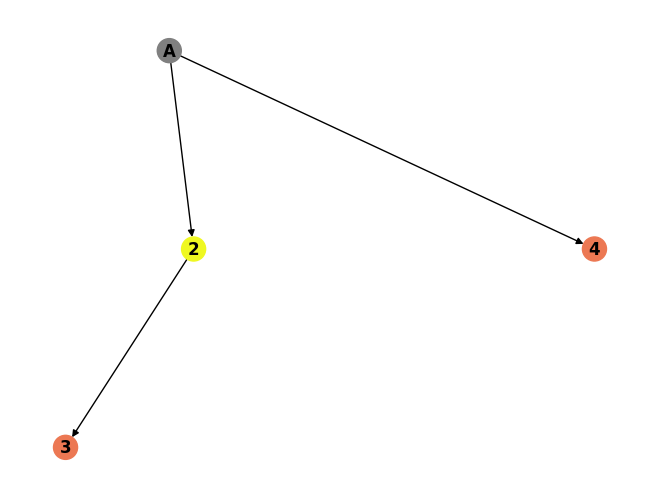

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.seterr(all="print")
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

join_and_split_axis_program = tc.compile("""
B[(ijk)] = A[i,j,k]
C[i,j] = B[(ij)]                                       
Row[j] = A[0,j,k]
""")

A = np.random.randn(3, 4, 5)
expected_B = A.reshape(60)
expected_C = expected_B.reshape(6, 10)
outputs = join_and_split_axis_program.execute(inputs={
    "A": A
}, shape_hints={
    "B": (60,),
    "C": (6,10),
    "Row": (4,)
})

print("B :", outputs["B"])
print("C :", outputs["C"])
print("Row :", outputs["Row"])

print("B ~= expected_B: ", np.allclose(outputs["B"], expected_B))
print("C ~= expected_C: ", np.allclose(outputs["C"], expected_C))

tc.viz.draw_program_graph(join_and_split_axis_program)

## Expressions with mutiple tensor orders

Positioning nodes


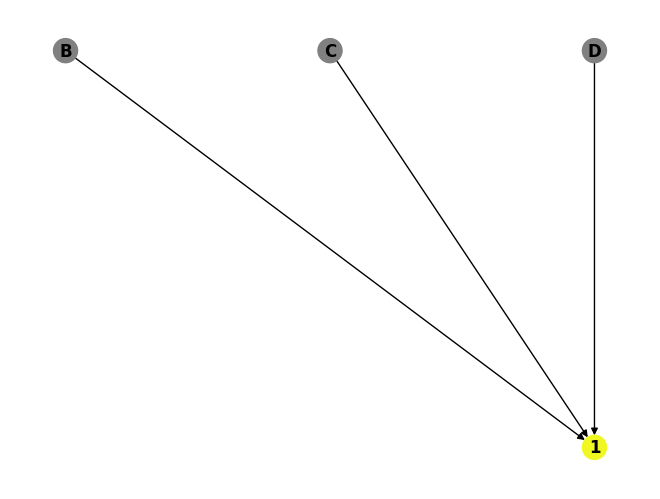

In [2]:
small_program = tc.compile("A[i,j] = B[i,j] + B[j,i] + C[i] + D + i")
tc.viz.draw_program_graph(small_program)

Positioning nodes


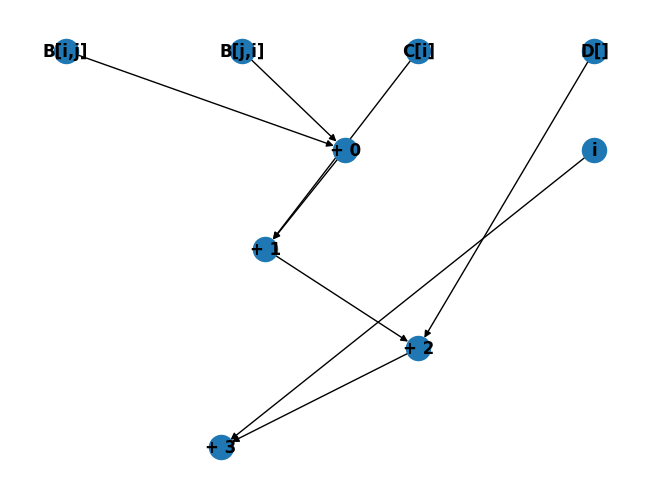

In [3]:
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [4]:

B = np.ones((10,10))
C = np.ones(10) + 10
expected = B + B.T + C + 100 + np.arange(10).reshape(-1,1)
result = small_program.execute({'B': B, 'C': C, 'D': 100}, shape_hints={'A': (10,10)})
print(expected)
print(result["A"])
np.all(result["A"] == expected)

[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121. 121.]
 [122. 122. 122. 122. 122. 122. 122. 122. 122. 122.]]
[[113. 113. 113. 113. 113. 113. 113. 113. 113. 113.]
 [114. 114. 114. 114. 114. 114. 114. 114. 114. 114.]
 [115. 115. 115. 115. 115. 115. 115. 115. 115. 115.]
 [116. 116. 116. 116. 116. 116. 116. 116. 116. 116.]
 [117. 117. 117. 117. 117. 117. 117. 117. 117. 117.]
 [118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
 [119. 119. 119. 119. 119. 119. 119. 119. 119. 119.]
 [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
 [121. 121. 121. 121. 121. 121. 121. 121. 121

np.True_

## Min reduction

In [5]:
min_red_program = tc.compile("""
Min[j] = 10000
Min[j] += (X[i,j] < Min[j]) * (X[i,j] - Min[j])
""")

X = np.random.randn(200,10)
expected = X.min(axis=0)
print(expected)

result = min_red_program.execute({'X': X}, shape_hints={'Min': (10,)})
print(result["Min"])
print(np.all(result["Min"] == expected))



[-3.47209275 -2.25745625 -2.21838622 -3.03727841 -2.76193367 -3.28320781
 -3.93338471 -2.70414556 -2.93208252 -2.3303054 ]
[-3.47209275 -2.25745625 -2.21838622 -3.03727841 -2.76193367 -3.28320781
 -3.93338471 -2.70414556 -2.93208252 -2.3303054 ]
True


## KMeans Kernel

Reducing the classic way
Reducing the classic way
Reducing the classic way
Min:  [ 0.90669492  4.34370017  0.          2.70131502  8.28975774  0.
  3.5384682   4.64954051  6.49158212  0.          6.15411866  2.48090688
  3.44732544  2.80556629  0.         11.90707068  2.41575683  2.96607649
  3.02405058  0.53831834]
expected_min:  [ 0.90669492  4.34370017  0.          2.70131502  8.28975774  0.
  3.5384682   4.64954051  6.49158212  0.          6.15411866  2.48090688
  3.44732544  2.80556629  0.         11.90707068  2.41575683  2.96607649
  3.02405058  0.53831834]
expected_Labels:  [3 3 0 2 0 2 3 2 3 1 1 3 3 2 3 0 3 3 3 0]
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True False]
Labels:  [4. 4. 0. 2. 0. 2. 4. 2. 4. 1. 1. 4. 4. 2. 4. 0. 4. 4. 4. 0.]
Dist ~= expected_Dist:  True
Min ~= expected_Min:  True
Labels ~= expected_Labels:  False
Count ~= expected_Count:  False
Update ~= expected_Update:  False
expected_Update: [[ 

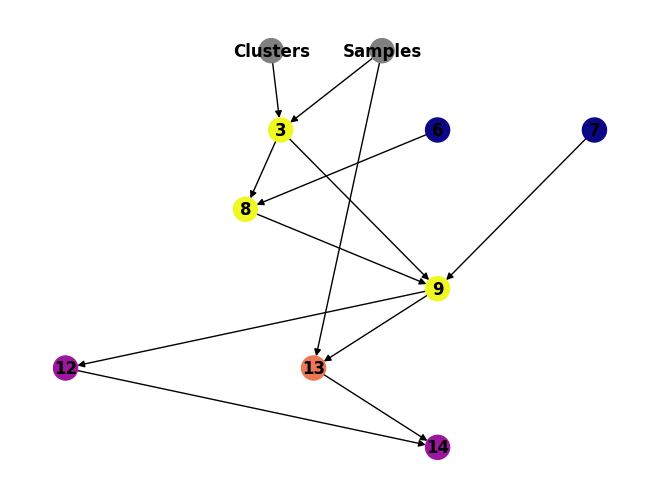

In [6]:
from scipy.spatial.distance import cdist
TOL = 1e-7

code = """
# Distance computation
Dist[j,k] += (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] += ( Dist[j,k] < Min[j] ) * ( Dist[j,k] - Min[j] )
Labels[j] += (Dist[j,k] == Min[j]) * (k - Labels[j])

# # Cluster update
Count[l] += (Labels[j] == l)
Update[l,k] += Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

n_samples = 20
sample_dim = 5
n_cluster = 5

Samples = np.random.randn(n_samples, sample_dim)
Clusters = Samples[np.random.randint(n_samples, size=n_cluster)]

# Compute expected labels
expected_Dist = cdist(Samples, Clusters, 'sqeuclidean')
expected_Min = np.min(expected_Dist, axis=1)
expected_Labels = expected_Dist.argmin(axis=1)

# Update cluster centers
expected_Count = np.zeros(n_cluster)
expected_Update = np.zeros((n_cluster, sample_dim))

for j in range(n_samples):
    l = expected_Labels[j]
    expected_Count[l] += 1
    expected_Update[l] += Samples[j]

expected_Update /= expected_Count.reshape(-1, 1)


outputs = kmeans_kernel.execute(inputs={
    'Samples': Samples,
    'Clusters': Clusters
}, shape_hints={
    'Dist': (n_samples, n_cluster),
    'Min': (n_samples,),
    'Labels': (n_samples,),
    'Count': (n_cluster,),
    'Update': (n_cluster, sample_dim)
})

print("Min: ", outputs['Min'])
print("expected_min: ", expected_Min)
print("expected_Labels: ", expected_Labels)
print(expected_Min == outputs['Min'])
print("Labels: ", outputs['Labels'])
print("Dist ~= expected_Dist: ", np.all(outputs['Dist'] == expected_Dist))
print("Min ~= expected_Min: ", np.allclose(outputs['Min'], expected_Min))
print("Labels ~= expected_Labels: ", np.all(outputs['Labels'] == expected_Labels))
print("Count ~= expected_Count: ", np.all(outputs['Count'] == expected_Count))
print("Update ~= expected_Update: ", np.allclose(outputs['Update'], expected_Update))
print(f"expected_Update: {expected_Update}")
print(f"Update: {outputs['Update']}")

draw_program_graph(kmeans_kernel, color_by="opcount")

Positioning nodes


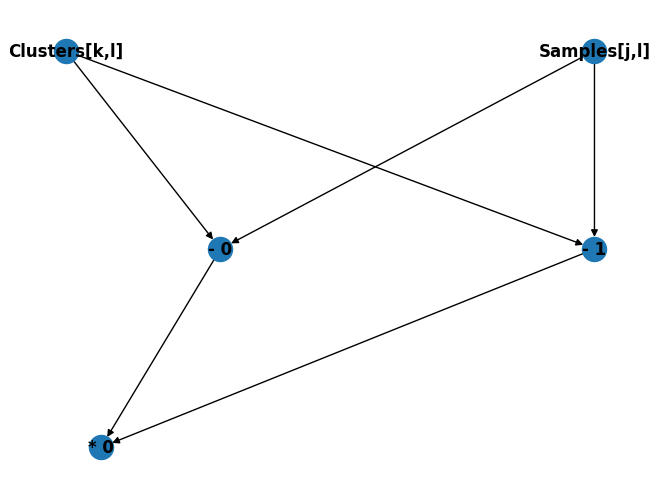

In [7]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

Positioning nodes


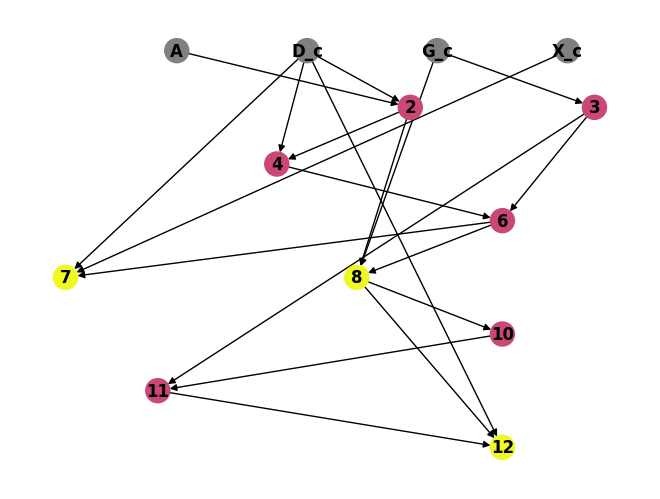

In [8]:
code = """
W_c[i] += A[i,j] * D_c[j]
Gamma_c += G_c[i] * G_c[i]
Theta_c += D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n += G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n += (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


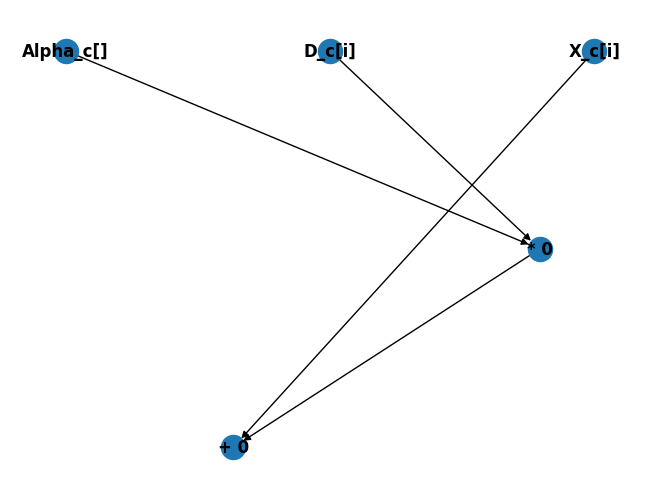

In [9]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

In [10]:
a = eval("1 + 2")

In [11]:
import networkx as nx
graph = nx.Graph()
graph.add_node(1, neg=True)
graph.add_node(2, neg=False)
for node in graph:
    print(nx.get_node_attributes(graph, 'neg')[node])

True
False


In [12]:
np.finfo(np.float64).eps

np.float64(2.220446049250313e-16)